<div class="alert alert-info">
    
➡️ Make sure that you have read the **[rules for hand-in assignments](https://www.ida.liu.se/~TDDE16/exam.en.shtml#handins)** and the **[policy on cheating and plagiarism](https://www.ida.liu.se/~TDDE16/exam.en.shtml#cheating)** before starting with this lab.

➡️ Make sure you fill in any cells (and _only_ those cells) that say **`YOUR CODE HERE`** or **YOUR ANSWER HERE**, and do _not_ modify any of the other cells.

➡️ **Before you submit your lab, make sure everything runs as expected.** For this, _restart the kernel_ and _run all cells_ from top to bottom. In Jupyter Notebook version 7 or higher, you can do this via "Run$\rightarrow$Restart Kernel and Run All Cells..." in the menu (or the "⏩" button in the toolbar).

</div>

# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

In [1]:
%matplotlib inline

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [2]:
import pandas as pd
import bz2

with bz2.open('speeches-201718.json.bz2') as source:
    speeches_201718 = pd.read_json(source)

with bz2.open('speeches-201819.json.bz2') as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [3]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [4]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [5]:
parties = sorted(training_data['party'].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by producing a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. **Write code to generate two bar plots that visualize this information**, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

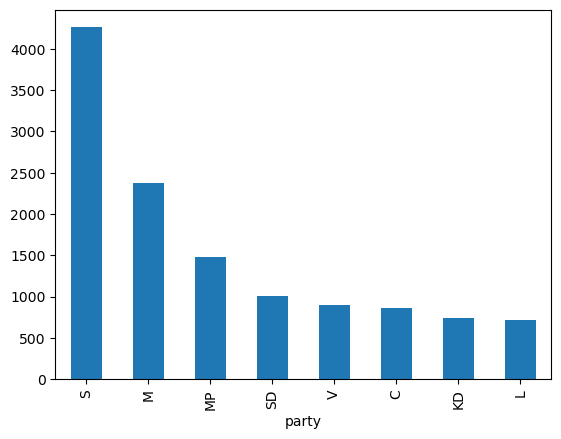

In [10]:
"""Produce a plot for the 2017/2018 speeches."""
import matplotlib.pyplot as plt
import pandas as pd


speeches_201718['party'].value_counts().plot(kind='bar')
plt.show()

# YOUR CODE HERE
# raise NotImplementedError()

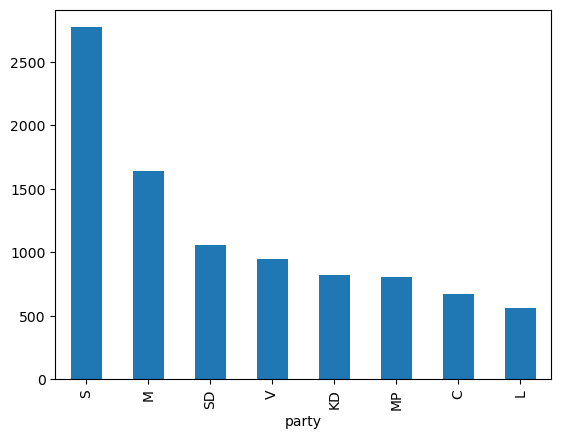

In [11]:
"""Produce a plot for the 2018/2019 speeches."""
# YOUR CODE HERE

speeches_201819['party'].value_counts().plot(kind='bar')
plt.show()

# raise NotImplementedError()

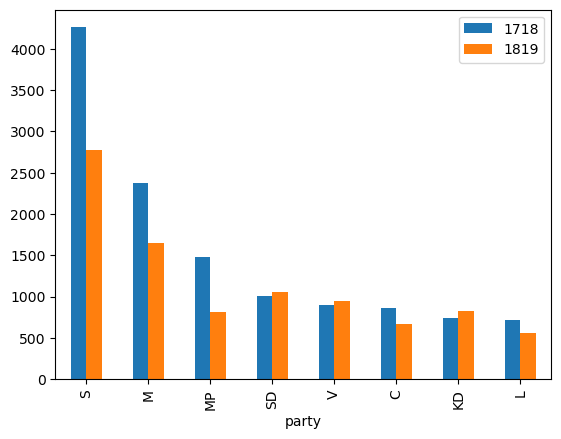

In [29]:
s1718 = speeches_201718['party'].value_counts()
s1819 = speeches_201819['party'].value_counts()

df1718 = s1718.to_frame().rename(columns={'count':'1718'})
df1819 = s1819.to_frame().rename(columns={'count':'1819'})
df1 = df1718.merge(df1819, on='party')

df1.plot.bar()
plt.show()


In [ ]:
# speeches_201718['party'].value_counts().plot(kind='bar',label = "1718",color='red')
# speeches_201819['party'].value_counts().plot(kind='bar',label = "1819")
# plt.legend()
# plt.show()

**Summarize your observations!**

2014 election result:
S-31.01%, M-23.33%, SD-12.86%, MP-6.89%, C-6.11%, V-5.72%, L-5.42%, KD-4.57%
2018 election result:
S-28.26%, M-19.84%, SD-17.53%, MP-4.41%, C-8.61%, V-8.00%, L-5.49%, KD-6.32%

we can see that from the plot of two different speech data there is a great drop for S,M,MP and slitly rise for SD,V,KD, and slight drop for C,L. 

from the election result we can see that the rise and drop 14-18 in general correspond to the speech 1718-1819, except C and L.


YOUR ANSWER HERE

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

**Write code to produce a Multinomial Naive Bayes classifier as described above and report its performance on the test data!**

In [134]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clfMNB = Pipeline([('Vectorizer',CountVectorizer()),('classifier',MultinomialNB())] )
clfMNB.fit(training_data['words'],  training_data['party'])

# raise NotImplementedError()

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [198]:
#test
vectorizer = CountVectorizer(ngram_range=(1,1))
vec = vectorizer.fit_transform(training_data['words'])

In [199]:
#test
print(training_data.shape)
vec.shape

(12343, 3)


(12343, 75125)

In [145]:
obs = test_data["party"]

In [135]:
print(classification_report(test_data["party"], clfMNB.predict(test_data["words"])))

              precision    recall  f1-score   support

           C       0.63      0.04      0.07       671
          KD       0.70      0.02      0.03       821
           L       0.92      0.02      0.04       560
           M       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           S       0.46      0.84      0.59      2773
          SD       0.57      0.12      0.20      1060
           V       0.59      0.15      0.24       950

    accuracy                           0.43      9288
   macro avg       0.57      0.26      0.24      9288
weighted avg       0.52      0.43      0.34      9288



In [109]:
#test
sum(clfMNB.predict(test_data["words"]) == test_data["party"])/9288

0.4280792420327304

In [ ]:
# X = training_data['words']
# y = training_data['party']
# clf1 = make_pipeline(CountVectorizer(),MultinomialNB() )
# clf1.fit(X, y)
# print(classification_report(test_data["party"], clf.predict(test_data["words"])))

Would you have expected the results that you got?

## Problem 3: Baselines

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline is a classifier that generates predictions by random sampling, respecting the training set&rsquo;s class distribution. This baseline is implemented by the class [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). 

**Write code to fit a random baseline on the training data and report its performance on the test data!**

In [114]:
# YOUR CODE HERE
from sklearn.dummy import DummyClassifier

X = training_data['words']
y = training_data['party']
clfDummy = make_pipeline(CountVectorizer(),DummyClassifier(strategy = 'stratified') )
clfDummy.fit(X, y)
print(classification_report(test_data["party"], clfDummy.predict(test_data["words"])))

# raise NotImplementedError()

              precision    recall  f1-score   support

           C       0.08      0.08      0.08       671
          KD       0.09      0.07      0.08       821
           L       0.07      0.07      0.07       560
           M       0.17      0.19      0.18      1644
          MP       0.10      0.13      0.11       809
           S       0.31      0.35      0.33      2773
          SD       0.12      0.09      0.10      1060
           V       0.09      0.06      0.08       950

    accuracy                           0.18      9288
   macro avg       0.13      0.13      0.13      9288
weighted avg       0.17      0.18      0.18      9288



An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline.

**Write code to fit the most-frequent-class baseline on the training data and report its performance on the test data!**

In [116]:
# YOUR CODE HERE
clfMF = make_pipeline(CountVectorizer(),DummyClassifier() )
clfMF.fit(X, y)
print(classification_report(test_data["party"], clfMF.predict(test_data["words"]),zero_division=1))
# raise NotImplementedError()

              precision    recall  f1-score   support

           C       1.00      0.00      0.00       671
          KD       1.00      0.00      0.00       821
           L       1.00      0.00      0.00       560
           M       1.00      0.00      0.00      1644
          MP       1.00      0.00      0.00       809
           S       0.30      1.00      0.46      2773
          SD       1.00      0.00      0.00      1060
           V       1.00      0.00      0.00       950

    accuracy                           0.30      9288
   macro avg       0.91      0.12      0.06      9288
weighted avg       0.79      0.30      0.14      9288



## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Summarise your results in a short text.

**Hint:** Your balanced subset should consist of 5,752 speeches.

**Write code to implement undersampling with the classifier from Problem 2 and report its performance on the test data!**

In [136]:
# YOUR CODE HERE
minCount = training_data['party'].value_counts().min()
training_data_balanced = training_data.groupby(by='party', group_keys=False).apply(lambda x:x.sample(minCount))
training_data_balanced.shape
# raise NotImplementedError()

(5752, 3)

In [141]:
# MultinomialNB
clfMNB.fit(training_data_balanced['words'],  training_data_balanced['party'])
predMNB_Ba =clfMNB.predict(test_data["words"])

print(classification_report(obs, predMNB_Ba))

              precision    recall  f1-score   support

           C       0.28      0.45      0.35       671
          KD       0.29      0.40      0.34       821
           L       0.28      0.44      0.34       560
           M       0.40      0.49      0.44      1644
          MP       0.35      0.38      0.37       809
           S       0.81      0.30      0.44      2773
          SD       0.47      0.38      0.42      1060
           V       0.39      0.56      0.46       950

    accuracy                           0.41      9288
   macro avg       0.41      0.43      0.39      9288
weighted avg       0.50      0.41      0.41      9288



In [138]:
# stratified
clfDummy.fit(training_data_balanced['words'],  training_data_balanced['party'])
print(classification_report(test_data["party"], clfDummy.predict(test_data["words"])))

              precision    recall  f1-score   support

           C       0.08      0.14      0.10       671
          KD       0.11      0.16      0.13       821
           L       0.06      0.13      0.08       560
           M       0.19      0.14      0.16      1644
          MP       0.09      0.13      0.11       809
           S       0.29      0.12      0.17      2773
          SD       0.12      0.12      0.12      1060
           V       0.10      0.13      0.11       950

    accuracy                           0.13      9288
   macro avg       0.13      0.13      0.12      9288
weighted avg       0.17      0.13      0.14      9288



In [139]:
# most frequent
clfMF.fit(training_data_balanced['words'],  training_data_balanced['party'])
print(classification_report(test_data["party"], clfMF.predict(test_data["words"]),zero_division=1))

              precision    recall  f1-score   support

           C       0.07      1.00      0.13       671
          KD       1.00      0.00      0.00       821
           L       1.00      0.00      0.00       560
           M       1.00      0.00      0.00      1644
          MP       1.00      0.00      0.00       809
           S       1.00      0.00      0.00      2773
          SD       1.00      0.00      0.00      1060
           V       1.00      0.00      0.00       950

    accuracy                           0.07      9288
   macro avg       0.88      0.12      0.02      9288
weighted avg       0.93      0.07      0.01      9288



**Provide a brief summary of the results.**

for imbalanced data, we have a baseline accuracy 0.18 for stratified and 0.30 for most frequency while in balanced data it is 0.13 and 0.07  

back to evaluation from problem 2 , the Naive Bayes classifier yields a 0.43 accuracy on imbalanced data while it's 0.41 for balanced data.  
but for imbalanced data we have a better f1-score for the most prevailed classes such as S,M and poor value for those less amounted classes to get a better overall accuracy but a lower macro or weighted avg f1-score. While in balanced data this problem are relatively fixed, especially the macro avg is much more better.

YOUR ANSWER HERE

## Problem 5: Confusion matrix

A **confusion matrix** is a specific table that is useful when analysing the performance of a classifier. In this table, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). To generate a visual representation, you can use [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).

Your task is to use the confusion matrix in order to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses with $p$ when it predicts the party of a speaker.

**Write code to display/plot the confusion matrix for the classifier from Problem 4 as evaluated on the test data!**

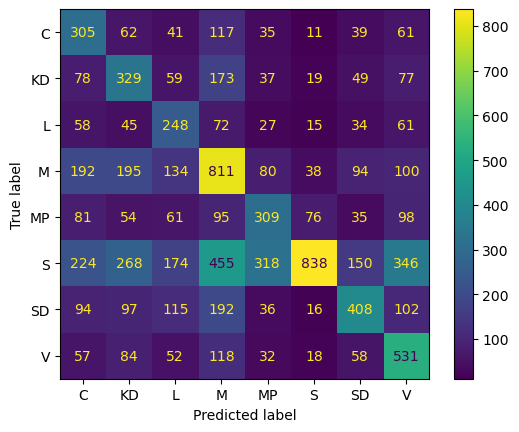

In [154]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


cm = confusion_matrix(obs,predMNB_Ba)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clfMNB.classes_)
disp.plot()
plt.show()
# raise NotImplementedError()

**Write code that, for each party $p$, print the party most often confused with $p$ by the classifier from Problem 4!**

In [175]:
# YOUR CODE HERE
import numpy as np

temp_cm = cm.copy()
np.fill_diagonal(temp_cm,0)
for idx,row in enumerate(temp_cm):
    print(f'for party {parties[idx]}, \
the party most often confused with is {parties[np.argmax(row)]} \
with {max(row)} instances')

# raise NotImplementedError()

for party C, the party most often confused with is M with 117 instances
for party KD, the party most often confused with is M with 173 instances
for party L, the party most often confused with is M with 72 instances
for party M, the party most often confused with is KD with 195 instances
for party MP, the party most often confused with is V with 98 instances
for party S, the party most often confused with is M with 455 instances
for party SD, the party most often confused with is M with 192 instances
for party V, the party most often confused with is M with 118 instances


M  as the second amounted class  but a much lower precision than the most amounted one. So it make sense that it have a high FP

Take a minute to reflect on whether your results make sense.

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words (binary) model in addition to the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting bigrams in addition to unigrams (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library.

**Write code to perform grid search, then print the results of your best model, along with the parameter values that yielded these results.**

In [179]:
clfMNB.named_steps


{'Vectorizer': CountVectorizer(), 'classifier': MultinomialNB()}

In [201]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

parameters = {'classifier__alpha':[1,0.1],\
              'Vectorizer__binary':[False,True],\
                'Vectorizer__ngram_range':[(1,1),(1,2)]}
clfGrid = GridSearchCV(clfMNB,parameters, cv=5,error_score='raise')
clfGrid.fit(training_data_balanced['words'],  training_data_balanced['party'])
print(classification_report(obs, clfGrid.predict(test_data["words"])))

# raise NotImplementedError()

              precision    recall  f1-score   support

           C       0.32      0.42      0.36       671
          KD       0.34      0.41      0.37       821
           L       0.29      0.43      0.34       560
           M       0.46      0.47      0.46      1644
          MP       0.32      0.45      0.37       809
           S       0.75      0.44      0.55      2773
          SD       0.49      0.44      0.46      1060
           V       0.47      0.57      0.51       950

    accuracy                           0.45      9288
   macro avg       0.43      0.45      0.43      9288
weighted avg       0.51      0.45      0.47      9288



In [211]:
clfGrid.best_score_
# By default, parameter search uses the score function of the estimator to evaluate a parameter setting.
# These are the sklearn.metrics.accuracy_score for classification

# but seems it is not the accuracy yield by model with best_params_

0.6267439277754694

In [ ]:
#test
# clfTemp = Pipeline([('Vectorizer',CountVectorizer(binary=True,ngram_range=(1,2))),\
#                    ('classifier',MultinomialNB(alpha=0.1))] )
# clfTemp.fit(training_data['words'],  training_data['party'])

In [ ]:
#test
# from sklearn.metrics import accuracy_score
# print(classification_report(test_data["party"], clfTemp.predict(test_data["words"])))

In [203]:
clfGrid.best_params_

{'Vectorizer__binary': True,
 'Vectorizer__ngram_range': (1, 2),
 'classifier__alpha': 0.1}

## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

**Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model.**

In [232]:
np.linspace(1,2,2).tolist()

[1.0, 2.0]

In [233]:
# YOUR CODE HERE
from sklearn.svm import SVC


clfSVC = Pipeline([('Vectorizer',CountVectorizer()),('classifier',SVC())] )
parameters = {'classifier__C':np.linspace(1,2,2).tolist(),\
              'Vectorizer__binary':[False,True]}

clfGrid2 = GridSearchCV(clfSVC,parameters, cv=5,error_score='raise',\
                       scoring='f1_weighted')

clfGrid2.fit(training_data_balanced['words'],  training_data_balanced['party'])
print(classification_report(obs, clfGrid2.predict(test_data["words"])))



# raise NotImplementedError()


# too time consuming training SVC()

              precision    recall  f1-score   support

           C       0.27      0.41      0.33       671
          KD       0.29      0.27      0.28       821
           L       0.25      0.34      0.29       560
           M       0.49      0.32      0.39      1644
          MP       0.24      0.50      0.32       809
           S       0.67      0.42      0.52      2773
          SD       0.39      0.51      0.44      1060
           V       0.46      0.39      0.42       950

    accuracy                           0.40      9288
   macro avg       0.38      0.40      0.37      9288
weighted avg       0.46      0.40      0.41      9288



In [234]:
clfGrid2.best_params_

{'Vectorizer__binary': True, 'classifier__C': 2.0}

**Congratulations on finishing this lab! 👍**

<div class="alert alert-info">
    
➡️ Don't forget to **test that everything runs as expected** before you submit!

</div>